In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
path = '../data/train.csv'

df = pd.read_csv(path)

# EDA

In [3]:
print('shape: ', df.shape)

df.head()

shape:  (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.drop('id', axis=1, inplace=True)

print ('Columns with null values\n')
print (df.isnull().sum())
print ('-' * 50)

df.info()

Columns with null values

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


We see there are no null rows and columns

In [5]:
# cummulative sum of the toxic comments, where comments could have more than 1 label 
# this is a multi-classification problem
df['toxic_cum_sum'] = df.iloc[:, 1:].sum(axis=1)

# negative comments would have >= 1 cum_sum
df['is_negative'] = df['toxic_cum_sum'].apply(lambda x: 1 if x >= 1 else 0)

In [6]:
df.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_cum_sum,is_negative
135898,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,0,0
124712,Please stop editing pages as you did to poop. ...,0,0,0,0,0,0,0,0
133591,""" \nOMG \nOMG \nOMG \nOMG \nOMG \nOMG \nOMG \n...",0,0,0,0,0,0,0,0
15972,"All right, who's the wise guy?\nthat removed t...",0,0,0,0,0,0,0,0
27780,"No such options with this unit, unfortunately....",0,0,0,0,0,0,0,0
49501,"Somehow, I should have been notified of that d...",0,0,0,0,0,0,0,0
33308,"""\n\n""""Wikipedia is no place for cruelty, even...",0,0,0,0,0,0,0,0
21623,Heja Helwada offered cited references that Kho...,0,0,0,0,0,0,0,0
94134,"No, There is a larger opposition than that. Al...",0,0,0,0,0,0,0,0
70279,Hi. \n\nHey. Can you give me a good thing to r...,0,0,0,0,0,0,0,0


In [7]:
print ('Total no. of negative comments:', df['is_negative'].sum())
print ('Breakdown of toxic_cum_sum:\n', df['toxic_cum_sum'].value_counts())

Total no. of negative comments: 16225
Breakdown of toxic_cum_sum:
 0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: toxic_cum_sum, dtype: int64


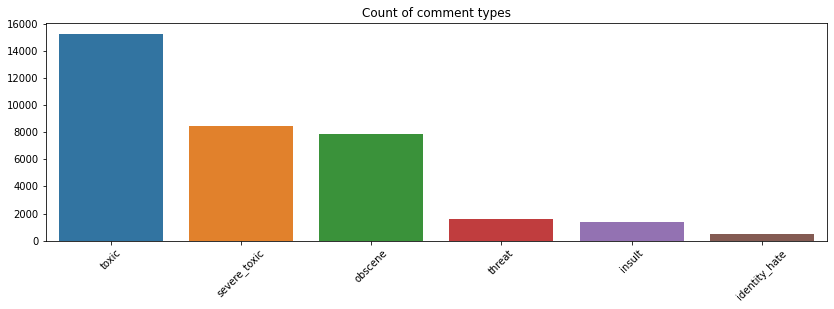

In [46]:
# we shall see how the comments are distributed
toxic_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

plt.figure(figsize=(14,4))
plt.title('Count of comment types')
sns.barplot(x=toxic_cols, 
            y=df[toxic_cols].sum().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.show()

In [149]:
# we see an imbalanced dataset where most of the comments are clean / non-toxic

print ('Toxic count of dataset:')
print (df[toxic_cols].sum().sort_values(ascending=False) / df.shape[0] * 100, '\n')

# print ('% of dataset')
# print (df[toxic_cols].sum().sort_values(ascending=False) / len(df) * 100)

Toxic count of dataset:
toxic            9.584448
obscene          5.294822
insult           4.936361
severe_toxic     0.999555
identity_hate    0.880486
threat           0.299553
dtype: float64 



Breakdown of multi-classification comments:
0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: toxic_cum_sum, dtype: int64


/anaconda3/envs/personal/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


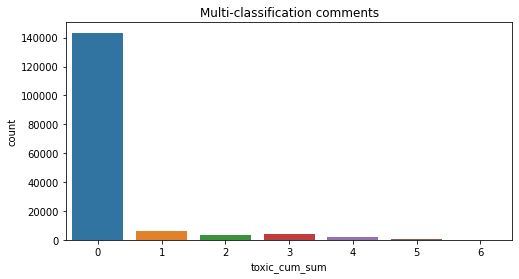

In [35]:
# checking the breakdown of multi-class toxic comments
# similar to the above findings, we see that majority of the comments are clean while most of the 
# toxic comments have a single classification, with up to classified as all classification

print ('Breakdown of multi-classification comments:')
print (df['toxic_cum_sum'].value_counts())

plt.figure(figsize=(8,4))
plt.title('Multi-classification comments')
sns.countplot(df['toxic_cum_sum'])
plt.show()

Negative Comments Count:
0    143346
1     16225
Name: is_negative, dtype: int64 

% Negative Comments: 
89.83211235124176
10.167887648758233


/anaconda3/envs/personal/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


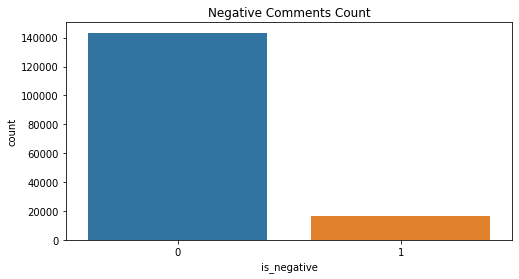

In [34]:
# we see there is an imbalanced dataset. we will have to perform random upsamping or downsampling of the dataset.
# we can also try to apply SMOTE for this dataset to see if there is any improvement on the model.

print ('Negative Comments Count:')
print (df['is_negative'].value_counts(), '\n')

print ('% Negative Comments: ')
print (df['is_negative'].value_counts()[0] / df.shape[0] * 100)
print (df['is_negative'].value_counts()[1] / df.shape[0] * 100)

plt.figure(figsize=(8,4))
plt.title('Negative Comments Count')
sns.countplot(df['is_negative'])
plt.show()

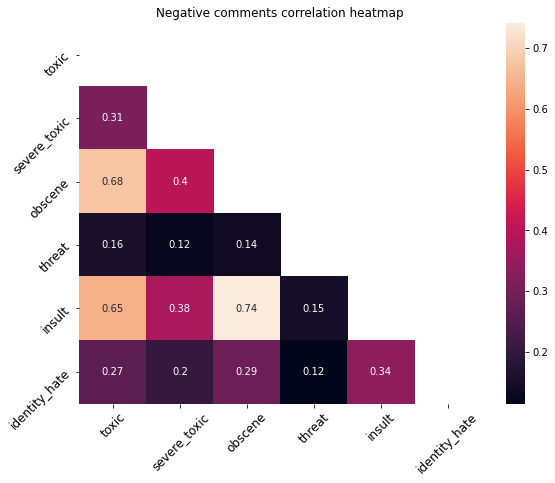

In [38]:
# we will see how correlated the different types of toxic comments
# we see that insult & toxic, insult & obscence and toxic and obscence are strongly correlated

corrs = df[toxic_cols].corr()

fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from Seaborn's example gallery).
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with Seaborn.
# Assign the matplotlib axis the function returns. This will allow us to resize the labels.
ax = sns.heatmap(corrs, mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=45)
plt.title('Negative comments correlation heatmap')
plt.show()

## Feature Engineering

In [62]:
def get_sentence_count(x):
    return len(sent_tokenize(x))

In [39]:
# does toxic comments have more sentences?
# df['sentence_count'] = df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
df['sentence_count'] = df["comment_text"].apply(get_sentence_count)

# does toxic comments have longer word count?
df['count_word'] = df["comment_text"].apply(lambda x: len(str(x).split()))

# does toxic comments have more unique words?
df['count_unique_word'] = df["comment_text"].apply(lambda x: len(set(str(x).split())))

In [44]:
analyzer = SentimentIntensityAnalyzer()
sentiment_polarity = df['comment_text'].apply(lambda x: analyzer.polarity_scores(x))

sentiment_polarity_df = pd.DataFrame(sentiment_polarity)
sentiment_polarity_df = sentiment_polarity_df['comment_text'].apply(pd.Series)
df = pd.concat([df, sentiment_polarity_df], axis=1)

## Sentence Count

Min sentence count:  1
Max sentence count:  683


/anaconda3/envs/personal/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


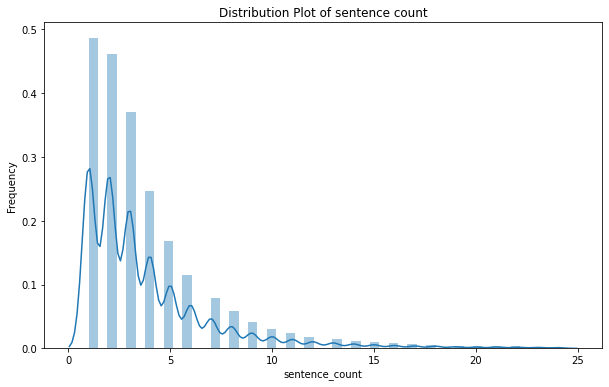

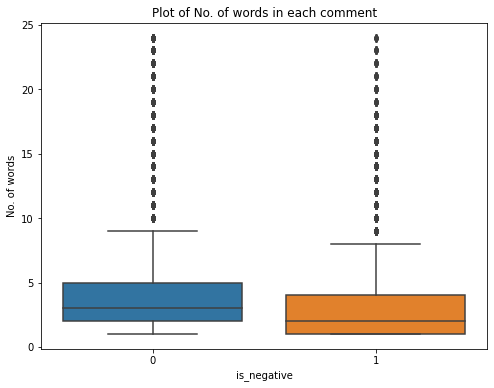

In [75]:
# looking at the number of sentence in each row
tmp_df = df[df['sentence_count'] < 25] # change num for sentence count

print ('Min sentence count: ', df['sentence_count'].min())
print ('Max sentence count: ', df['sentence_count'].max())

plt.figure(figsize=(10,6))
sns.distplot(tmp_df['sentence_count'])#, kde=False, bins=30)
plt.title('Distribution Plot of sentence count')
plt.ylabel('Frequency')

plt.figure(figsize=(8,6))
sns.boxplot(x='is_negative', y='sentence_count', data=tmp_df)
plt.title('Plot of No. of words in each comment')
plt.xlabel('is_negative')
plt.ylabel('No. of words')

plt.show()

In [74]:
df[df['sentence_count'] > 200]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_cum_sum,is_negative,sentence_count,count_word,count_unique_word,neg,neu,pos,compound
4712,do go fuck off bastard\nDo Yyou Have a life?\n...,1,1,1,1,1,0,5,1,683,1403,33,0.772,0.227,0.001,-1.0000
5523,Go fuck yourself! Go fuck yourself! Go fuck yo...,1,1,1,0,1,0,4,1,277,831,3,0.637,0.363,0.000,-1.0000
16643,'''Hi Wikipedia!!Hi Wikipedia!!Hi Wikipedia!!H...,0,0,0,0,0,0,0,0,357,358,3,0.000,1.000,0.000,0.0000
19179,U SUCK!!!!\nU SUCK!!!!'U SUCK!!!!U SUCK!!!!'U ...,1,1,1,0,1,0,4,1,256,321,5,0.426,0.574,0.000,-0.9995
22378,I fuck niggas! I fuck niggas! I fuck niggas! I...,1,1,1,0,1,1,5,1,334,1001,4,0.854,0.146,0.000,-1.0000
35028,OH LAWDY.\nOH LAWDY.\nOH LAWDY.\nOH LAWDY.\nOH...,0,0,0,0,0,0,0,0,313,625,3,0.000,1.000,0.000,0.0000
36778,Do I know you? ==BeCauSe You aRe a FGGT!\n Do ...,1,0,0,0,0,0,1,1,201,901,11,0.000,1.000,0.000,0.0000
46197,heil hitler! heil hitler! heil hitler! heil hi...,1,0,0,0,0,0,1,1,385,770,3,0.000,1.000,0.000,0.0000
47604,"""\n\n \nMONGO, tell us. WHY DID YOU DO WTC? ...",1,0,0,0,0,0,1,1,253,844,18,0.000,1.000,0.000,0.0000
51399,I am a homo sexual. I am a homo sexual. I am...,1,0,0,0,0,0,1,1,238,1188,5,0.000,1.000,0.000,0.0000


It seems that negative comments have lower sentences. Comments that have high number of sentences (>200) tend to be spams or negative comments.

## Word count

In [83]:
tmp_df = df[df['count_word'] >= 0] # change num for sentence count

print ('Min word count: ', df['count_word'].min())
print ('Max word count: ', df['count_word'].max())

Min word count:  1
Max word count:  1411


/anaconda3/envs/personal/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


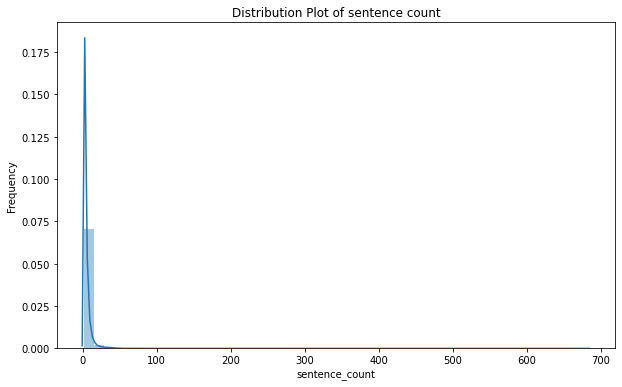

In [84]:
plt.figure(figsize=(10,6))
sns.distplot(tmp_df['sentence_count'])#, kde=False, bins=30)
plt.title('Distribution Plot of sentence count')
plt.ylabel('Frequency')
plt.show()

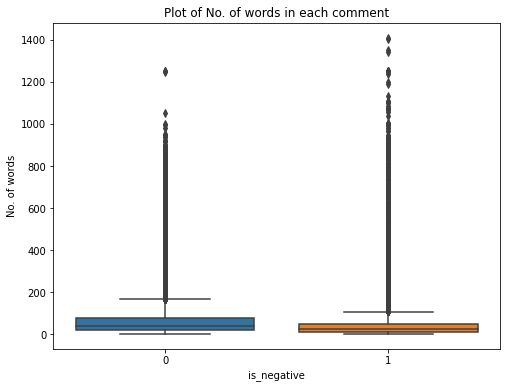

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_negative', y='count_word', data=tmp_df)
plt.title('Plot of No. of words in each comment')
plt.xlabel('is_negative')
plt.ylabel('No. of words')
plt.show()

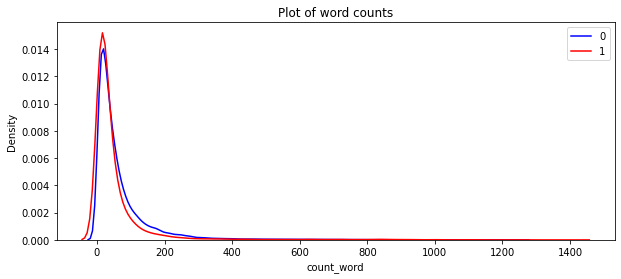

In [150]:
plt.figure(figsize=(10,4))
ax = sns.kdeplot(df[df['is_negative'] == 0].count_word, color='b', label='0')
ax = sns.kdeplot(df[df['is_negative'] == 1].count_word, color='r', label='1')
plt.title('Plot of word counts')
plt.legend()
plt.show()

In [88]:
classifications = df.columns.values[1:7]

for classification in classifications:
    print ('{}:'.format(classification))
    print (df[df[classification] == 1]['comment_text'].sample(2, random_state=42), '\n')

toxic:
54995                            Hi! \n\nI wanna rape you!
22018    Terrorize \nI will terrorise you for as long a...
Name: comment_text, dtype: object 

severe_toxic:
90354     "\n\n WHAT  IN THE FUCK ARE YOU REFERRING TOO ...
113229    takes it up the arse.  takes it up the arse.  ...
Name: comment_text, dtype: object 

obscene:
113629    You are an utter fucking faggot...u need a lif...
14153     WTF! \n\nu fckin faggot ass mutha fcker u jus ...
Name: comment_text, dtype: object 

threat:
157361    if you do not stop, the wikapidea nijas will c...
11199     Fuck you Sarcasticidealist i will kill you wit...
Name: comment_text, dtype: object 

insult:
27944      FUCK YOU ALL, LOSERS \n\nFUCK OFF MY PAGE, FAGS
32879    What are you retarded? I already am blocked. W...
Name: comment_text, dtype: object 

identity_hate:
124316                REDIRECT Talk:Bolivian chinchilla rat
57276     TO SITUSH(PAKISTANI  PIG) \n\nWhat  is your pr...
Name: comment_text, dtype: object 



## Unique word count

In [131]:
tmp_df = df[df['count_unique_word'] >= 0] # change num for sentence count

print ('Min word count: ', df['count_unique_word'].min())
print ('Max word count: ', df['count_unique_word'].max())

Min word count:  1
Max word count:  816


/anaconda3/envs/personal/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


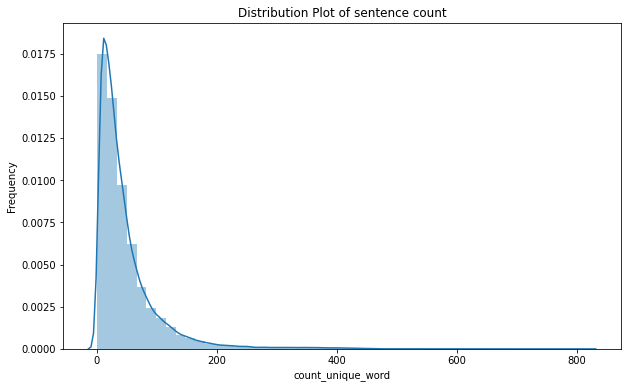

In [132]:
plt.figure(figsize=(10,6))
sns.distplot(tmp_df['count_unique_word'])#, kde=False, bins=30)
plt.title('Distribution Plot of sentence count')
plt.ylabel('Frequency')
plt.show()

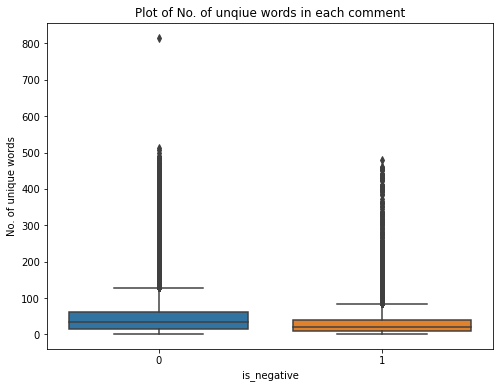

In [133]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_negative', y='count_unique_word', data=tmp_df)
plt.title('Plot of No. of unqiue words in each comment')
plt.xlabel('is_negative')
plt.ylabel('No. of unique words')
plt.show()

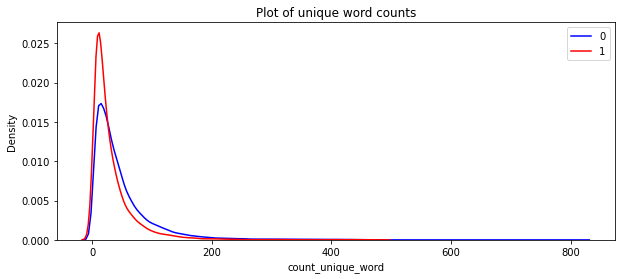

In [135]:
plt.figure(figsize=(10,4))
ax = sns.kdeplot(df[df['is_negative'] == 0].count_unique_word, color='b', label='0')
ax = sns.kdeplot(df[df['is_negative'] == 1].count_unique_word, color='r', label='1')
plt.title('Plot of unique word counts')
plt.legend()
plt.show()

## Clean the comments column

In [112]:
df['comment_text'][1]

# we see there are '\n' in the comments below. we will need to replace any \n or \r or \t with ' '.
# we will also change encoding to ascii encoding and decode

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [90]:
df['comment_text_clean'] = df['comment_text'].apply(lambda x: x.replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
                                              .replace("'", "").replace(",", "").encode('ascii', errors='ignore')
                                              .decode())# if type(x) is str else x)

# df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(x.split()))

## Tokenize comments

In [213]:
from nltk.stem import WordNetLemmatizer

In [216]:

lemmatizer.lemmatize(df['comment_text_clean'].iloc[0].split()[0])

'Explanation'

In [217]:
def get_tok_clean_comments(df, add_stopwords=None):
    tok_clean_comments = []
    if add_stopwords is None:
        stop_words = set(stopwords.words('english'))
    elif type(add_stopwords) == list:
        for i in add_stopwords:
            stop_words.add(i)
    else:
        raise Exception('Unknown input. Please check.')
        
    lemmatizer = WordNetLemmatizer()
    for i in range(df.shape[0]):
        comments = word_tokenize(df.loc[i, 'comment_text_clean'])
        tok_clean_comments.append([lemmatizer.lemmatize(w.lower()) for w in comments \
                                   if w.isalpha() and w.lower() not in stop_words])
    return tok_clean_comments


def get_word_count(comment):
    word_count = {}
    for word in comment:
        if word in word_count.keys():
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

In [218]:
df['tok_clean_comments'] = get_tok_clean_comments(df)

In [157]:
# df['word_count'] = df['tok_clean_comments'].apply(get_word_count)

In [219]:
def get_top_n_words(df, label):
    word_count = {}
    tmp_df = df[df[label] == 1]
    for i in range(len(tmp_df)):
        comments = tmp_df['tok_clean_comments'].iloc[i]
        for word in comments:
            if word in word_count.keys():
                word_count[word] += 1
            else:
                word_count[word] = 1
    tmp_df = pd.DataFrame.from_dict(word_count, orient='index', columns=['word_count'])
    return tmp_df.sort_values('word_count', ascending=False)

In [221]:
n_toxic = get_top_n_words(df, 'toxic').reset_index()
n_severe_toxic = get_top_n_words(df, 'severe_toxic').reset_index()
n_obscene = get_top_n_words(df, 'obscene').reset_index()
n_threat = get_top_n_words(df, 'threat').reset_index()
n_insult = get_top_n_words(df, 'insult').reset_index()
n_identity_hate = get_top_n_words(df, 'identity_hate').reset_index()

all_neg = {'toxic': n_toxic,
           'severe_toxic': n_severe_toxic,
           'obscene': n_obscene,
           'threat': n_threat,
           'insult': n_insult,
           'identity_hate': n_identity_hate
          }

In [222]:
def plot_n_words(df, figsize, label, n):
    plt.figure(figsize=figsize)
    sns.barplot(x='index', y='word_count', data=df.iloc[:n,:])
    plt.xlabel(label)
    plt.title(f'N words for {label}')
    plt.show()

## Top n words for each label

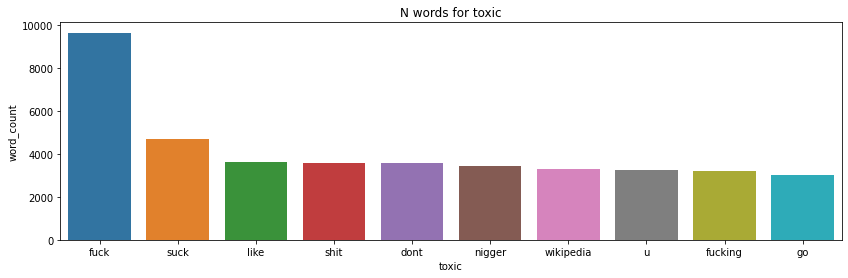

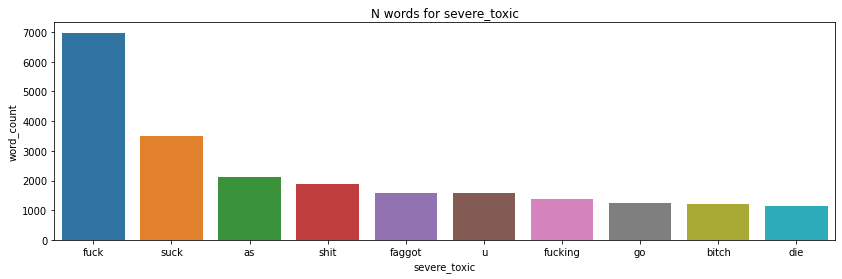

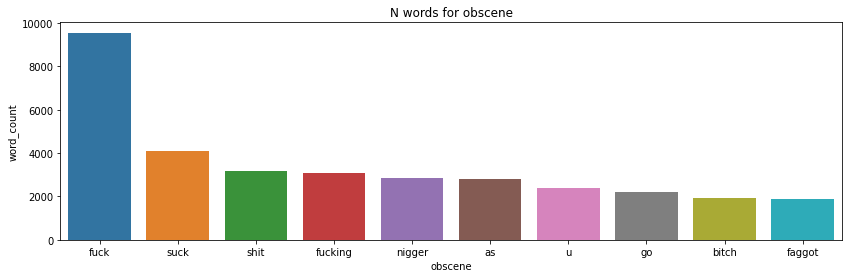

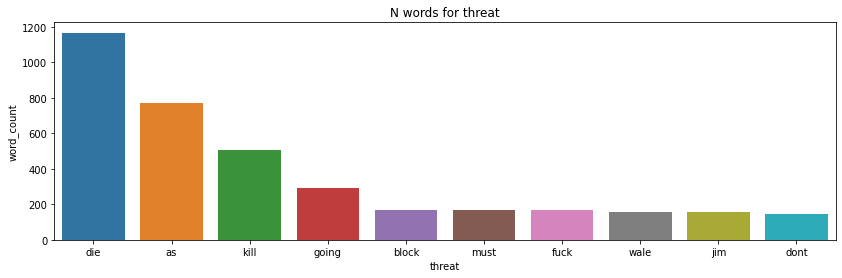

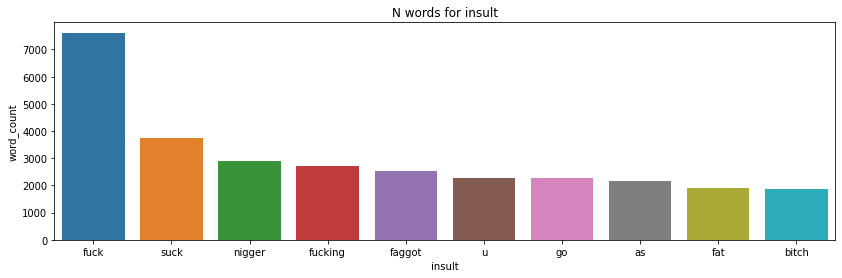

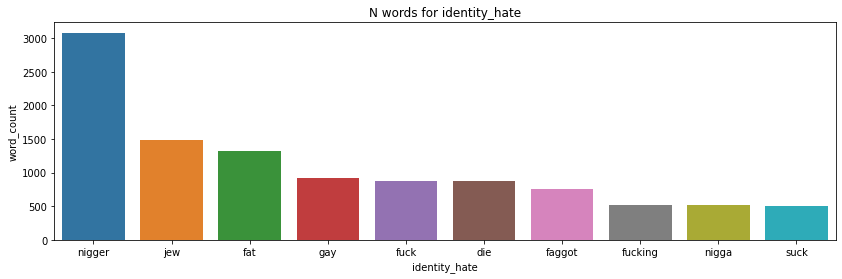

In [223]:
for k,v in all_neg.items():
    plot_n_words(v, figsize, k, 10)

There are some words like 'fuck' that overlap between the different labels. However, we also see words that are more related to the label. For example,:
<br><b>identity_hate</b>: 'nigger', 'jew', 'fat'</br>
<br><b>insult</b>: 'suck', 'nigger', 'faggot'</br>
<br><b>threat</b>: 'die', 'kill'</br>

## Char count

In [232]:
def get_char_count(x):
    return len(x.replace(' ', ''))

def get_unq_char_count(x):
    return len(set(x.replace(' ', '')))

In [233]:
df['char_count'] = df['comment_text_clean'].apply(get_char_count)
df['unq_char_count'] = df['comment_text_clean'].apply(get_unq_char_count)

In [234]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_cum_sum,is_negative,sentence_count,...,count_unique_word,neg,neu,pos,compound,comment_text_clean,tok_clean_comments,word_count,char_count,unq_char_count
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,0,3,...,41,0.000,0.899,0.101,0.5574,Explanation Why the edits made under my userna...,"[explanation, edits, made, username, hardcore,...","{'explanation': 1, 'why': 1, 'edits': 1, 'made...",218,45
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,0,4,...,17,0.099,0.743,0.158,0.2942,Daww! He matches this background colour Im see...,"[daww, match, background, colour, im, seemingl...","{'daww': 1, 'he': 1, 'matches': 1, 'background...",91,36
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,0,3,...,39,0.083,0.849,0.068,-0.1779,Hey man Im really not trying to edit war. Its ...,"[hey, man, im, really, trying, edit, war, guy,...","{'hey': 1, 'man': 1, 'im': 1, 'really': 1, 'tr...",189,26
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,0,4,...,82,0.039,0.906,0.055,0.2500,""" More I cant make any real suggestions on imp...","[cant, make, real, suggestion, improvement, wo...","{'more': 1, 'i': 4, 'cant': 1, 'make': 1, 'rea...",503,34
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,0,2,...,13,0.000,0.663,0.337,0.6808,You sir are my hero. Any chance you remember w...,"[sir, hero, chance, remember, page, thats]","{'you': 1, 'sir': 1, 'hero': 1, 'any': 1, 'cha...",52,21


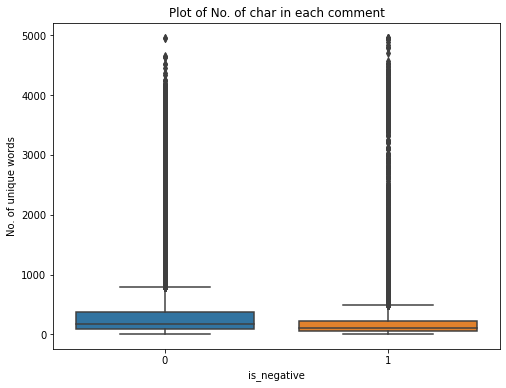

In [236]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_negative', y='char_count', data=df)
plt.title('Plot of No. of char in each comment')
plt.xlabel('is_negative')
plt.ylabel('No. of unique words')
plt.show()

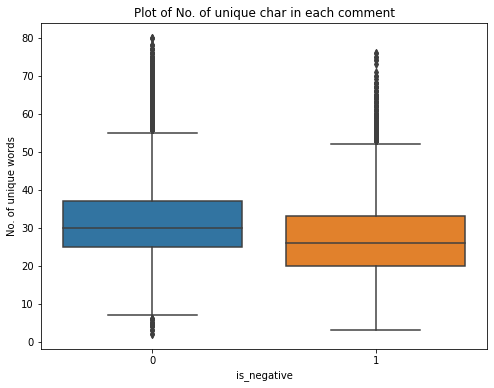

In [237]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_negative', y='unq_char_count', data=df)
plt.title('Plot of No. of unique char in each comment')
plt.xlabel('is_negative')
plt.ylabel('No. of unique words')
plt.show()

## N-grams

# Others

In [100]:
classifications = df[toxic_cols].columns.values

for classification in classifications:
    print ('{}:'.format(classification))
    print (df[df[classification] == 1]['comment_text_clean'].sample(2, random_state=42), '\n')

toxic:
54995                              Hi!   I wanna rape you!
22018    Terrorize  I will terrorise you for as long as...
Name: comment_text_clean, dtype: object 

severe_toxic:
90354     "   WHAT  IN THE FUCK ARE YOU REFERRING TOO   ...
113229    takes it up the arse.  takes it up the arse.  ...
Name: comment_text_clean, dtype: object 

obscene:
113629    You are an utter fucking faggot...u need a lif...
14153     WTF!   u fckin faggot ass mutha fcker u jus re...
Name: comment_text_clean, dtype: object 

threat:
157361    if you do not stop the wikapidea nijas will co...
11199     Fuck you Sarcasticidealist i will kill you wit...
Name: comment_text_clean, dtype: object 

insult:
27944          FUCK YOU ALL LOSERS   FUCK OFF MY PAGE FAGS
32879    What are you retarded? I already am blocked. W...
Name: comment_text_clean, dtype: object 

identity_hate:
124316                REDIRECT Talk:Bolivian chinchilla rat
57276     TO SITUSH(PAKISTANI  PIG)   What  is your prob...
Name: comment

In [271]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [272]:
import os, sys

if '../' not in sys.path:
    sys.path.append('../')
print (sys.path)

from src.datapipeline import DataIngest, DataPipeline

['/anaconda3/envs/personal/lib/python36.zip', '/anaconda3/envs/personal/lib/python3.6', '/anaconda3/envs/personal/lib/python3.6/lib-dynload', '', '/Users/arsyad/.local/lib/python3.6/site-packages', '/anaconda3/envs/personal/lib/python3.6/site-packages', '/anaconda3/envs/personal/lib/python3.6/site-packages/IPython/extensions', '/Users/arsyad/.ipython', '../']


In [273]:
ingest = DataIngest()
file = ingest.read_data(path, 'csv')

In [274]:
dp = DataPipeline()
dp.clean_data(file)

add_stopwords: None <class 'NoneType'>


In [275]:
file.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_cum_sum,is_negative,sentence_count,count_word,count_unique_word,comment_text_clean,char_count,unq_char_count,tok_clean_comments
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,0,3,43,41,Explanation Why the edits made under my userna...,218,45,"[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,0,4,17,17,Daww! He matches this background colour Im see...,91,36,"[daww, match, background, colour, im, seemingl..."
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,0,3,42,39,Hey man Im really not trying to edit war. Its ...,189,26,"[hey, man, im, really, trying, edit, war, guy,..."
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,0,4,113,82,""" More I cant make any real suggestions on imp...",503,34,"[cant, make, real, suggestion, improvement, wo..."
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,0,2,13,13,You sir are my hero. Any chance you remember w...,52,21,"[sir, hero, chance, remember, page, thats]"


In [297]:
a = 0
b = 1
c = 0
i = 10

while b < i:
    print (b)
    c = b + a
    a = b
    b = c
#     a, b = c, a
    

1
1
2
3
5
8


In [319]:
a = 123
sign = [1, -1][a < 0]
if sign > 0:
    print ('pos')
else:
    print ('neg')

pos


In [404]:
a = 134
b = 134

a is b

True

AttributeError: 'str' object has no attribute 'remove'